In [1]:
import numpy as np
import pandas as pd
import panel as pn
import hvplot.pandas

PRIMARY_COLOR = "#0072B5"
SECONDARY_COLOR = "#B54300"
CSV_FILE = (
    "https://raw.githubusercontent.com/holoviz/panel/main/examples/assets/occupancy.csv"
)

In [2]:
import xarray as xr
import xradar as xd
import cmweather
import matplotlib.pyplot as plt
import pyproj
import cartopy
import hvplot.xarray

In [3]:
# dirname = "/Users/brenda/data/from_Alex/for_hawkeye_demo/Goshen_tornado_2009/DOW6/20090605";
dirname = "/Users/brenda/data/APAR"   # MICA_testing"
# need to send the earth radius because the latitudes don't vary
# enough for the default calculation
#
#filename = "cfrad.20090605_223048.231_to_20090605_223055.341_DOW6_PPI.nc"

#dirname = "/Users/brenda/data"
#filename = "cfrad.20161006_190650.891_to_20161006_191339.679_KAMX_SUR.nc"
# need to untar and gunzip .Z files
filename = "cfrad.20010101_010000.006_to_20010101_010000.744_APAR_sim_AIR.nc" # "KTLX19910606_075656"
localfilename = dirname + "/" + filename
#radar = xd.io.open_cfradial1_datatree(localfilename) # , engine="netcdf4" ) #first_dim="auto")
#radar = xd.io.open(localfilename)
ds = xr.open_dataset(localfilename) # , group="sweep_0") # , engine="nexradlevel2")
display(ds)

<xarray.Dataset> Size: 1MB
Dimensions:                           (frequency: 1, sweep: 1, r_calib: 1,
                                       time: 68, range: 500)
Coordinates:
  * frequency                         (frequency) float32 4B -9.999e+12
  * time                              (time) datetime64[ns] 544B 2001-01-01T0...
  * range                             (range) float32 2kB 150.0 ... 7.5e+04
Dimensions without coordinates: sweep, r_calib
Data variables: (12/114)
    volume_number                     float64 8B ...
    platform_type                     |S32 32B ...
    primary_axis                      |S32 32B ...
    status_xml                        |S1 1B ...
    instrument_type                   |S32 32B ...
    radar_antenna_gain_h              float32 4B ...
    ...                                ...
    z                                 (time, range) float32 136kB ...
    Zhh                               (time, range) float32 136kB ...
    WRF_U                             (time, range) float32 136kB ...
    WRF_V                             (time, range) float32 136kB ...
    WRF_W                             (time, range) float32 136kB ...
    WRF_HEIG                          (time, range) float32 136kB ...
Attributes: (12/25)
    Conventions:          CF-1.6
    Sub_conventions:      CF-Radial instrument_parameters radar_parameters ra...
    version:              CF-Radial-1.3
    title:                WRF-derived simulate
    institution:          
    references:           WRF and
    ...                   ...
    site_name:            
    scan_name:            
    scan_id:              0
    platform_is_mobile:   true
    n_gates_vary:         false
    ray_times_increase:   true

In [4]:
field = ds.data_vars.get("VEL")
display(field.long_name)
display(type(field))
display(field[:,300].data)
field_nonan = field.fillna(-99999.99)
field_nonan[:,300].data


'radial_velocity'

xarray.core.dataarray.DataArray

array([         nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan, -16.64      , -10.09      ,  -5.04      ,
        -3.36      ,  -1.9799999 ,  -0.90999997,   0.29999998,
         1.39      ,   2.19      ,   2.59      ,   2.35      ,
         0.74      ,  -1.0699999 ,  -2.6599998 ,  -3.8899999 ,
        -4.44      ,  -4.66      ,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,       

array([-9.9999992e+04, -9.9999992e+04, -9.9999992e+04, -9.9999992e+04,
       -9.9999992e+04, -9.9999992e+04, -9.9999992e+04, -9.9999992e+04,
       -9.9999992e+04, -9.9999992e+04, -9.9999992e+04, -9.9999992e+04,
       -9.9999992e+04, -9.9999992e+04, -9.9999992e+04, -9.9999992e+04,
       -9.9999992e+04, -9.9999992e+04, -9.9999992e+04, -9.9999992e+04,
       -9.9999992e+04, -9.9999992e+04, -9.9999992e+04, -9.9999992e+04,
       -9.9999992e+04, -9.9999992e+04, -9.9999992e+04, -9.9999992e+04,
       -9.9999992e+04, -9.9999992e+04, -9.9999992e+04, -9.9999992e+04,
       -9.9999992e+04, -1.6639999e+01, -1.0090000e+01, -5.0400000e+00,
       -3.3599999e+00, -1.9799999e+00, -9.0999997e-01,  2.9999998e-01,
        1.3900000e+00,  2.1900001e+00,  2.5899999e+00,  2.3499999e+00,
        7.4000001e-01, -1.0699999e+00, -2.6599998e+00, -3.8899999e+00,
       -4.4400001e+00, -4.6599998e+00, -9.9999992e+04, -9.9999992e+04,
       -9.9999992e+04, -9.9999992e+04, -9.9999992e+04, -9.9999992e+04,
      

In [5]:
list(ds.data_vars)

['volume_number',
 'platform_type',
 'primary_axis',
 'status_xml',
 'instrument_type',
 'radar_antenna_gain_h',
 'radar_antenna_gain_v',
 'radar_beam_width_h',
 'radar_beam_width_v',
 'radar_rx_bandwidth',
 'time_coverage_start',
 'time_coverage_end',
 'grid_mapping',
 'sweep_number',
 'sweep_mode',
 'polarization_mode',
 'prt_mode',
 'follow_mode',
 'fixed_angle',
 'target_scan_rate',
 'sweep_start_ray_index',
 'sweep_end_ray_index',
 'rays_are_indexed',
 'ray_angle_res',
 'r_calib_time',
 'r_calib_pulse_width',
 'r_calib_xmit_power_h',
 'r_calib_xmit_power_v',
 'r_calib_two_way_waveguide_loss_h',
 'r_calib_two_way_waveguide_loss_v',
 'r_calib_two_way_radome_loss_h',
 'r_calib_two_way_radome_loss_v',
 'r_calib_receiver_mismatch_loss',
 'r_calib_radar_constant_h',
 'r_calib_radar_constant_v',
 'r_calib_antenna_gain_h',
 'r_calib_antenna_gain_v',
 'r_calib_noise_hc',
 'r_calib_noise_vc',
 'r_calib_noise_hx',
 'r_calib_noise_vx',
 'r_calib_receiver_gain_hc',
 'r_calib_receiver_gain_vc',

In [6]:
pn.extension(design="material", sizing_mode="stretch_width")

In [7]:
@pn.cache
def get_data():
  return pd.read_csv(CSV_FILE, parse_dates=["date"], index_col="date")

data = get_data()

data.tail()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1
2015-02-10 09:33:00,21.10,36.2000,447.0,821.000000,0.005612,1


In [8]:
def transform_data(variable, window, sigma):
    """Retrieve data for the variable at the window=range; sigma selects the time"""
    #avg = data[variable].rolling(window=window).mean()
    #residual = data[variable] - avg
    #std = residual.rolling(window=window).std()
    #outliers = np.abs(residual) > std * sigma
    field = ds.data_vars.get(variable)
    #display(field.long_name)
    #display(type(field))
    #display(field[:,window].data)
    field2 = field.fillna(-99999.99)
    field2[sigma,:].data    
    return field2[sigma,:], field2[sigma+1,:]

#def transform_data(variable, window, sigma):
#    """Calculates the rolling average and identifies outliers"""
#    avg = data[variable].rolling(window=window).mean()
#    residual = data[variable] - avg
#    std = residual.rolling(window=window).std()
#    outliers = np.abs(residual) > std * sigma
#    return avg, avg[outliers]


def get_plot(variable="VEL", window=300, sigma=10):
    """Plots the rolling average and the outliers"""
    avg, highlight = transform_data(variable, window, sigma)
    return avg.hvplot(
        height=300, legend=False, color=PRIMARY_COLOR
    ) * highlight.hvplot.scatter(color=SECONDARY_COLOR, padding=0.1, legend=False)



In [9]:
avg, highlight = transform_data("VEL", 300, 10)
display(' - - - - - ')
display(highlight.data)
#get_plot(variable='VEL', window=300, sigma=10)

#avg.hvplot(
#        height=300, legend=False, color=PRIMARY_COLOR
#    )

' - - - - - '

array([-8.5799999e+00, -8.9099998e+00, -9.2500000e+00, -9.6099997e+00,
       -1.0000000e+01, -1.0389999e+01, -1.0780000e+01, -1.1179999e+01,
       -1.1580000e+01, -1.1990000e+01, -9.9999992e+04, -9.9999992e+04,
       -9.9999992e+04, -9.9999992e+04, -9.9999992e+04, -9.9999992e+04,
       -9.9999992e+04, -9.9999992e+04, -9.9999992e+04, -9.9999992e+04,
       -9.9999992e+04, -9.9999992e+04, -9.9999992e+04, -9.9999992e+04,
       -9.9999992e+04, -9.9999992e+04, -9.9999992e+04, -9.9999992e+04,
       -9.9999992e+04, -9.9999992e+04, -9.9999992e+04, -9.9999992e+04,
       -9.9999992e+04, -9.9999992e+04, -9.9999992e+04, -9.9999992e+04,
       -9.9999992e+04, -9.9999992e+04, -9.9999992e+04, -9.9999992e+04,
       -9.9999992e+04, -9.9999992e+04, -9.9999992e+04, -9.9999992e+04,
       -9.9999992e+04, -9.9999992e+04, -9.9999992e+04, -9.9999992e+04,
       -9.9999992e+04, -9.9999992e+04, -9.9999992e+04, -9.9999992e+04,
       -9.9999992e+04, -9.9999992e+04, -9.9999992e+04, -9.9999992e+04,
      

In [10]:
variable_widget = pn.widgets.Select(name="variable", value="VEL", options=list(ds.data_vars))
window_widget = pn.widgets.IntSlider(name="range", value=30, start=150, end=75000)
sigma_widget = pn.widgets.IntSlider(name="sigma", value=10, start=0, end=20)

In [11]:
#variable_widget = pn.widgets.Select(name="variable", value="Temperature", options=list(data.columns))
#window_widget = pn.widgets.IntSlider(name="window", value=30, start=1, end=60)
sigma_widget = pn.widgets.IntSlider(name="sigma", value=10, start=0, end=20)

In [12]:
get_plot(variable='VEL', window=300, sigma=10)

:Overlay
   .Curve.I   :Curve   [range]   (radial_velocity)
   .Scatter.I :Scatter   [range]   (radial_velocity)

In [72]:
#bound_plot = pn.bind(
#    get_plot, variable=variable_widget, window=window_widget, sigma=sigma_widget
#)

In [73]:
#widgets = pn.Column(variable_widget, window_widget, sigma_widget, sizing_mode="fixed", width=300)
#pn.Column(widgets, bound_plot)

Column(design=<class 'panel.theme.materi..., sizing_mode='stretch_width')
    [0] Column(design=<class 'panel.theme.materi..., sizing_mode='fixed', width=300)
        [0] Select(design=<class 'panel.theme.materi..., name='variable', options=['volume_number', ...], sizing_mode='stretch_width', value='VEL')
        [1] IntSlider(design=<class 'panel.theme.materi..., end=75000, name='range', sizing_mode='stretch_width', start=150, value=30)
        [2] IntSlider(design=<class 'panel.theme.materi..., end=20, name='sigma', sizing_mode='stretch_width', value=10)
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False, design=<class 'panel.theme.materi..., sizing_mode='stretch_width')

In [74]:
#pn.template.MaterialTemplate(
#    site="Panel",
#    title="Getting Started App",
#    sidebar=[variable_widget, window_widget, sigma_widget],
#    main=[bound_plot],
#).servable(); # The ; is needed in the notebook to not display the template. Its not needed in a script

In [4]:
#@pn.cache
#def get_data():
#  return pd.read_csv(CSV_FILE, parse_dates=["date"], index_col="date")

#data = get_data()

#data.tail()
import requests
import json

#wdata = pd.read_json("https://api.weather.gov/radar/stations")

In [6]:
#df = pd.DataFrame({ 'radar_name': radar_name, 'Latitude' : lats, 'Longitude' : lons, 'coords':coords } )
#df.head(3)

,radar_name,Latitude,Longitude,coords
0,KBGM,-75.98472,42.19969,"[-75.98472, 42.1996899]"
1,KMVX,-97.32499,47.52805,"[-97.32499, 47.52805]"
2,KHPX,-87.28499,36.73666,"[-87.2849899, 36.73666]"


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
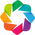

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]

In [13]:
# here ... 
#import geoviews as gv
#import geoviews.feature as gf

#from geoviews import opts
#from cartopy import crs

#gv.extension('bokeh', 'matplotlib')
#df2 = pd.DataFrame({ 'radar_name': ["boulder"], 'Latitude' : [40.014984], 'Longitude' : [-105.270546] } )
#df2.hvplot.points('Longitude', 'Latitude', geo=True, 
#                 tiles=True, color='red', alpha=0.2,
#                 )

In [42]:
#import xarray as xr
#import holoviews as hv
#import hvplot.xarray
#locs = ["KTYX", "KLGX"]
#data = [[-75.68, 43.75582], [-124.10663, 47.11689]]
#times = [1,2]
#foo = xr.DataArray(data, coords=[times, locs], dims=["lat", "lon"])
#foo



<xarray.DataArray (lat: 2, lon: 2)>
array([[ -75.68   ,   43.75582],
       [-124.10663,   47.11689]])
Coordinates:
  * lat      (lat) int64 1 2
  * lon      (lon) <U4 'KTYX' 'KLGX'

In [41]:
#foo.hvplot.points(x=loc[)

:Points   [location,rname]   (value)